In [2]:
import pandas as pd
import json

In [3]:
data0 = pd.read_csv("output_json/part0.json", header=None, sep="\n")

In [4]:
data0.head(2)

,0
0,"{""key"":""<http://sk.dbpedia.org/resource/%22Her..."
1,"{""key"":""<http://sk.dbpedia.org/resource/%22ale..."


In [5]:
def load_data(path):
    data = pd.read_csv(path, header=None, sep="\n")
    data_dict = {
        'key':[],
        'id':[],
        'label':[],
        'categories':[],
        'links':[],
        'external_links':[]
    }

    for _, row in data.iterrows():
        row_json = json.loads(row[0])
        
        data_dict['key'].append(row_json['key'])
        data_dict['id'].append(row_json['value']['id']['int'])
        label = row_json['value']['pageLabel']['string'] if row_json['value']['pageLabel'] != None else ""  
        data_dict['label'].append(label)
        data_dict['categories'].append(row_json['value']['categories'])
        data_dict['links'].append(row_json['value']['links'])
        data_dict['external_links'].append(row_json['value']['externalLinks'])

    return pd.DataFrame(data_dict)

In [6]:
data0 = load_data("output_json/part0.json")
data1 = load_data("output_json/part1.json")
data2 = load_data("output_json/part2.json")
data3 = load_data("output_json/part3.json")
data = pd.concat([data0, data1, data2, data3], ignore_index=True, sort=False)

----------
Let's count **number of pages**

In [7]:
len(data0) + len(data1) + len(data2) + len(data3)

354720

----------
Check whether there are some **duplicates**

In [8]:
r1 = data0.key.duplicated().any()
r2 = data1.key.duplicated().any()
r3 = data2.key.duplicated().any()
r4 = data3.key.duplicated().any()
print(r1, r2, r3, r4)

False False False False


So, there are **no** duplicates
_______________________


Let's find out a site with the highest number of **categories**

In [9]:
max_i0 = data0.categories.apply(lambda x: len(x)).idxmax()
max_i1 = data1.categories.apply(lambda x: len(x)).idxmax()
max_i2 = data2.categories.apply(lambda x: len(x)).idxmax()
max_i3 = data3.categories.apply(lambda x: len(x)).idxmax() 

In [10]:
len(data0.iloc[max_i0].categories) , len(data1.iloc[max_i1].categories), len(data2.iloc[max_i2].categories), len(data3.iloc[max_i3].categories)

(62, 28, 29, 31)

In [11]:
data0.iloc[max_i0].label

'Angličtina'

In [12]:
data0.iloc[max_i0].key

'<http://sk.dbpedia.org/resource/Angličtina>'

In [13]:
data0.iloc[max_i0].categories[0], data0.iloc[max_i0].categories[1], data0.iloc[max_i0].categories[2]

('Jazyky_v_Antigue_a_Barbude', 'Jazyky_v_Zimbabwe', 'Jazyky_v_Zambii')

In [28]:
categories_len = data.categories.apply(lambda x: len(x))

<AxesSubplot:ylabel='Frequency'>

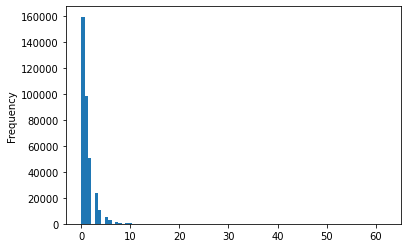

In [29]:
categories_len.plot.hist(bins=90)

<AxesSubplot:>

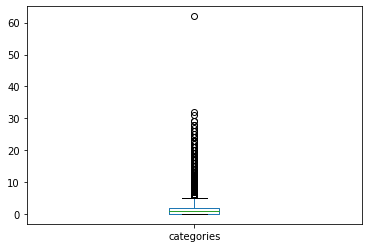

In [33]:
categories_len.plot.box()

<AxesSubplot:>

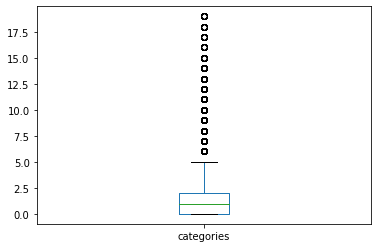

In [34]:
categories_len[categories_len < 20].plot.box()

-----------
## External links

In [19]:

max_i0 = data0.external_links.apply(lambda x: len(x)).idxmax()
max_i1 = data1.external_links.apply(lambda x: len(x)).idxmax()
max_i2 = data2.external_links.apply(lambda x: len(x)).idxmax()
max_i3 = data3.external_links.apply(lambda x: len(x)).idxmax() 

In [20]:
len(data0.iloc[max_i0].external_links) , len(data1.iloc[max_i1].external_links), len(data2.iloc[max_i2].external_links), len(data3.iloc[max_i3].external_links)

(154, 489, 493, 254)

In [21]:
data2.iloc[max_i2].key

'<http://sk.dbpedia.org/resource/Zoznam_ostrovov_Írska>'

In [26]:
data2.iloc[max_i2].external_links[0], data2.iloc[max_i2].external_links[1]

('http://www.logainm.ie/101097.aspx', 'http://www.logainm.ie/22439.aspx')